# Importing datasets, cleaning and initial statistical description

## 1. SETUP AND IMPORTS

### Libraries

In [36]:
# Essential libraries for data analysis
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx
import os

### Function definition

In [37]:

# Spatial join to find administrative boundaries for each point
def find_admin_boundaries(coordinates_gdf, boundaries_gdf):
    """
    Find the administrative boundary for each point.
    :param coordinates_gdf: GeoDataFrame with Point geometries.
    :param boundaries_gdf: GeoDataFrame with Polygon geometries.
    :return: GeoDataFrame with matched administrative boundaries.
    """
    # Ensure the same CRS
    if coordinates_gdf.crs != boundaries_gdf.crs:
        boundaries_gdf = boundaries_gdf.to_crs(coordinates_gdf.crs)
    
    # Perform spatial join
    joined = gpd.sjoin(coordinates_gdf, boundaries_gdf, how="left", predicate="within")
    return joined


# Example usage (uncomment and replace with actual file paths):
# main("coordinates.csv", "boundaries.shp", "output.csv")

## 2. DATA LOADING

### Subnational Administrative Boundaries (adm2)

In [38]:
# Load administrative boundaries
admin_boundaries = gpd.read_file("./input/data/geoBoundaries-NGA-ADM2-all/geoBoundaries-NGA-ADM2.shp")

### DHS data

In [39]:
# Importing data 
## Load individual dataset
ndhs_df = pd.read_csv("./output/data/ndhs/df_NDHS1990_2018.csv")
## Load cluster coordinates and convert to geodataframe
ndhs_coordinate = pd.read_excel("./input/data/ndhs/ngaDhsShapefileRaw.xlsx")
ndhs_coordinate = gpd.GeoDataFrame(ndhs_coordinate,geometry=gpd.points_from_xy(ndhs_coordinate['LONGNUM'], ndhs_coordinate['LATNUM']),crs="EPSG:4326")  # WGS 84 coordinate system

## 3. DATA CLEANING


### NDHS

### 3.1 Missing Values

### 3.2 Data Types

### 3.3 Duplicates

### 3.4 Feature Engineering

## 4. EXPLORATORY DATA ANALYSIS (EDA)

### 4.1 Statistical Description

#### NDHS

<Axes: >

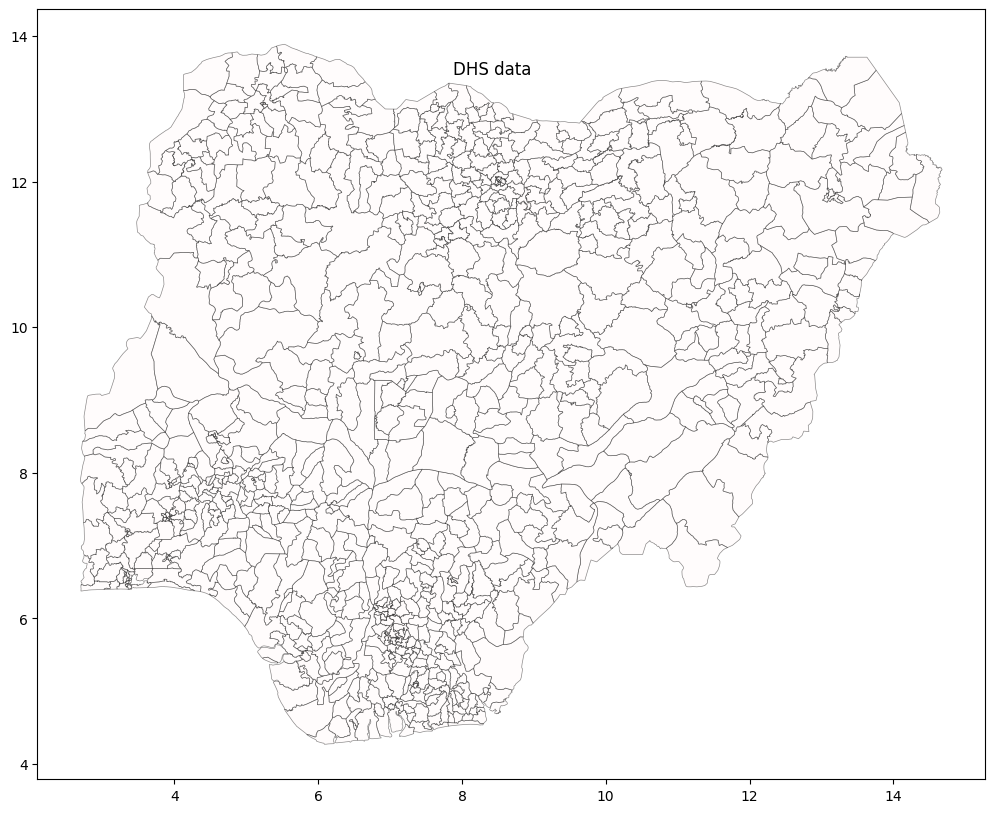

In [40]:
fig, ax = plt.subplots(nrows=1,ncols=1, sharex=False, sharey=False,figsize=(15,10))

# Setting a common title
fig.text(0.5, 0.815, "DHS data", ha="center", fontsize=12)

# Plotting
admin_boundaries.plot(ax=ax, lw=0.5, alpha=0.45, color="snow", edgecolor='black', legend=True)


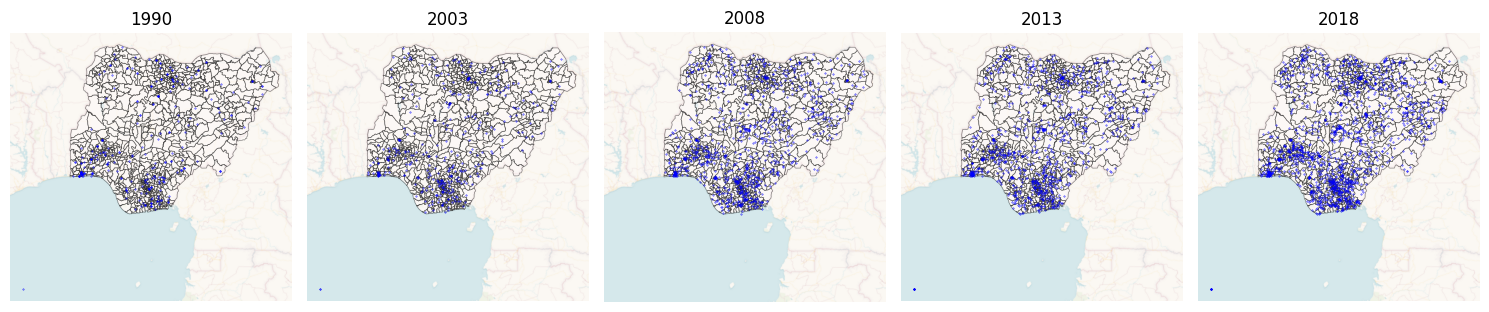

In [41]:
fig, ax = plt.subplots(nrows=1,ncols=5, sharex=True, sharey=True,figsize=(15,10))

# Plotting
admin_boundaries.to_crs('EPSG:4326').plot(ax=ax[0], lw=0.5, alpha=0.45, color="snow", edgecolor='black')
admin_boundaries.to_crs('EPSG:4326').plot(ax=ax[1], lw=0.5, alpha=0.45, color="snow", edgecolor='black')
admin_boundaries.to_crs('EPSG:4326').plot(ax=ax[2], lw=0.5, alpha=0.45, color="snow", edgecolor='black')
admin_boundaries.to_crs('EPSG:4326').plot(ax=ax[3], lw=0.5, alpha=0.45, color="snow", edgecolor='black')
admin_boundaries.to_crs('EPSG:4326').plot(ax=ax[4], lw=0.5, alpha=0.45, color="snow", edgecolor='black')

# # Adding the cluster center points
ndhs_coordinate[ndhs_coordinate["DHSYEAR"]==5].plot(ax=ax[0], marker='o', color='blue', markersize=0.1, label='Surveyed cluster');
ndhs_coordinate[ndhs_coordinate["DHSYEAR"]==4].plot(ax=ax[1], marker='o', color='blue', markersize=0.1, legend=False);
ndhs_coordinate[ndhs_coordinate["DHSYEAR"]==3].plot(ax=ax[2], marker='o', color='blue', markersize=0.1, legend=False);
ndhs_coordinate[ndhs_coordinate["DHSYEAR"]==2].plot(ax=ax[3], marker='o', color='blue', markersize=0.1, legend=False);
ndhs_coordinate[ndhs_coordinate["DHSYEAR"]==1].plot(ax=ax[4], marker='o', color='blue', markersize=0.1, legend=False);

# Extract the legend from an axes - used the last axes for the smaller sample data
leg1 = ax[0].get_legend()

# # extract the handles
# handles = leg1.legend_handles
# # # get the label text
# labels = [v.get_text() for v in leg1.texts]
# # # get the title text
# title = leg1.get_title().get_text() 


# Add base map
cx.add_basemap(ax[0],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = False, crs='EPSG:4326')
cx.add_basemap(ax[1],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = False, crs='EPSG:4326')
cx.add_basemap(ax[2],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = False, crs='EPSG:4326')
cx.add_basemap(ax[3],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = False, crs='EPSG:4326')
cx.add_basemap(ax[4],  source=cx.providers.CartoDB.VoyagerNoLabels, attribution = False, crs='EPSG:4326')

# Sans axe 
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')

# set facecolor
ax[0].set_facecolor("white")
ax[1].set_facecolor("white")
ax[2].set_facecolor("white")
ax[3].set_facecolor("white")
ax[4].set_facecolor("white")

# Set title and legend title
ax[0].title.set_text("1990")
ax[1].title.set_text("2003")
ax[2].title.set_text("2008")
ax[3].title.set_text("2013")
ax[4].title.set_text("2018")

# Remove the legend on the individual graphs
#ax[0].get_legend().remove()

# Removes ticks and lat/lon labels
ax[0].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)
ax[1].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)
ax[2].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)
ax[3].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)
ax[4].tick_params(axis='both', bottom=False, left=False,labelbottom=False, labelleft=False)

# Remove the legend on the individual graphs


# Adjust individual spaces
fig.subplots_adjust(wspace=0.01, hspace=0.5)
#fig.legend(title=leg1.get_title().get_text(),handles=leg1.legend_handles,labels=[v.get_text() for v in leg1.texts],bbox_to_anchor=(1, 0.77),loc='upper left',frameon=False)

# but requires the title to be spaced accordingly
fig.tight_layout()
fig.subplots_adjust(top=0.88)

# saving plot
plt.savefig(os.getcwd() + '\\output\\img\\ndhs\\DHS_data.jpeg', bbox_inches='tight')

### 4.2 Distribution Analysis

### 4.3 Correlation Analysis

## 5. VISUALIZATION